In [60]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
from dotenv import load_dotenv

load_dotenv()

subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))



# Definirea funcției pentru recunoașterea textului dintr-o imagine
def recognize_text(image_path):
    # Citirea imaginii
    img = open(image_path, "rb")
    read_response = computervision_client.read_in_stream(
        image=img,
        mode="Printed",
        raw=True
    )
    # print(read_response.as_dict())

    operation_id = read_response.headers['Operation-Location'].split('/')[-1]
    while True:
        read_result = computervision_client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    # Print the detected text, line by line
    result = []
    if read_result.status == OperationStatusCodes.succeeded:
        for text_result in read_result.analyze_result.read_results:
            for line in text_result.lines:
                for word in line.words:
                    print(word.text)
                    result.append(word.text)
                    # result.append(word.bounding_box)
                    
            

    return result
    print()

# Exemplu de utilizare
image_path = "test1.png"
extracted_text = recognize_text(image_path)
print("Text extras din imagine:")
print(extracted_text)

image_path = "test2.jpeg"
extracted_text = recognize_text(image_path)
print("Text extras din imagine:")
print(extracted_text)


def returnCharacters(words):
    characters = []
    for word in words:
        for char in word:
            characters.append(char)
    return characters


Google
Cloud
Platform
Text extras din imagine:
['Google', 'Cloud', 'Platform']
Lucces
in
resolvarea
TEMELOR
la
LABORA
toarele
de
Inteligenta
Artificialà!
Text extras din imagine:
['Lucces', 'in', 'resolvarea', 'TEMELOR', 'la', 'LABORA', 'toarele', 'de', 'Inteligenta', 'Artificialà!']


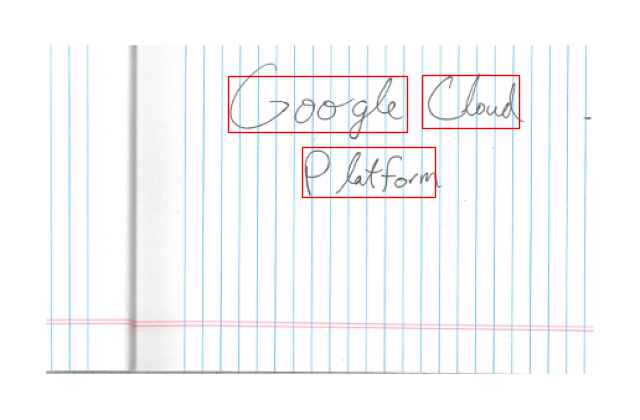

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_boxes(image_path, bounding_boxes):
    img = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)

    ax = plt.gca()
    for box in bounding_boxes:
        if len(box) >= 8:
            x_coords = [box[i] for i in range(0, len(box), 2)]
            y_coords = [box[i] for i in range(1, len(box), 2)]
            x_min, x_max = min(x_coords), max(x_coords)
            y_min, y_max = min(y_coords), max(y_coords)
            w = x_max - x_min
            h = y_max - y_min
            rect = patches.Rectangle((x_min, y_min), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        else:
            print("Coordinatelor chenarelor nu sunt într-un format corespunzător:", box)
    
    plt.axis('off')
    plt.show()

image_path = "test1.png"
bounding_boxes = [[175.0, 54.0, 320.0, 53.0, 320.0, 95.0, 175.0, 98.0],
                  [332.0, 53.0, 410.0, 52.0, 409.0, 94.0, 332.0, 95.0],
                  [235.0, 111.0, 341.0, 110.0, 342.0, 149.0, 235.0, 151.0]]
draw_boxes(image_path, bounding_boxes)


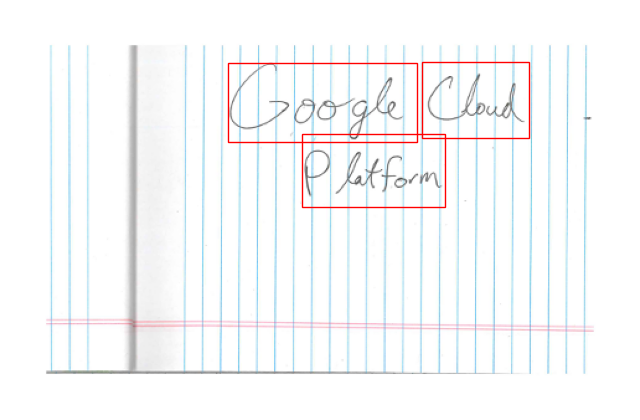

In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_boxes(image_path, bounding_boxes):
    # Afisarea imaginii
    img = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)

    ax = plt.gca()
    for box in bounding_boxes:
        if len(box) >= 8:
            x_coords = [box[i] for i in range(0, len(box), 2)]
            y_coords = [box[i] for i in range(1, len(box), 2)]
            x_min, x_max = min(x_coords), max(x_coords)
            y_min, y_max = min(y_coords), max(y_coords)
            y_min = y_min - 10
            y_max = y_max + 8
            x_max = x_max + 8
            w = x_max - x_min
            h = y_max - y_min
            rect = patches.Rectangle((x_min, y_min), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        else:
            print("Coordinatelor chenarelor nu sunt într-un format corespunzător:", box)
    
    plt.axis('off')
    plt.show()

image_path = "test1.png"
bounding_boxes = [[175.0, 54.0, 320.0, 53.0, 320.0, 95.0, 175.0, 98.0],
                  [332.0, 53.0, 410.0, 52.0, 409.0, 94.0, 332.0, 95.0],
                  [235.0, 111.0, 341.0, 110.0, 342.0, 149.0, 235.0, 151.0]]
draw_boxes(image_path, bounding_boxes)


In [66]:
def calculate_overlap(box1, box2):
    x1_min, y1_min, x1_max, y1_max = min(box1[::2]), min(box1[1::2]), max(box1[::2]), max(box1[1::2])
    x2_min, y2_min, x2_max, y2_max = min(box2[::2]), min(box2[1::2]), max(box2[::2]), max(box2[1::2])

    x_overlap = max(0, min(x1_max, x2_max) - max(x1_min, x2_min))
    y_overlap = max(0, min(y1_max, y2_max) - max(y1_min, y2_min))

    intersection_area = x_overlap * y_overlap
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)

    overlap_ratio = intersection_area / min(box1_area, box2_area)
    return overlap_ratio

def calculate_quality(bounding_boxes_1, bounding_boxes_2, threshold=1.0):
    matches = 0

    for box1 in bounding_boxes_1:
        for box2 in bounding_boxes_2:
            overlap_ratio = calculate_overlap(box1, box2)
            if overlap_ratio >= threshold:
                matches += 1
                break 

    quality = matches / len(bounding_boxes_1)
    return quality

image_path_1 = "test1.png"
image_path_2 = "test2.jpeg"

bounding_boxes_1 = [[175.0, 54.0, 320.0, 53.0, 320.0, 95.0, 175.0, 98.0],
                    [332.0, 53.0, 410.0, 52.0, 409.0, 94.0, 332.0, 95.0],
                    [235.0, 111.0, 341.0, 110.0, 342.0, 149.0, 235.0, 151.0]]

bounding_boxes_2 = [[180.0, 54.0, 330.0, 55.0, 330.0, 90.0, 180.0, 100.0],
                    [330.0, 53.0, 420.0, 52.0, 419.0, 96.0, 332.0, 95.0],
                    [235.0, 111.0, 345.0, 110.0, 345.0, 150.0, 235.0, 152.0]]

quality = calculate_quality(bounding_boxes_1, bounding_boxes_2)
print("Calitatea celor 2 incadrari este: ", quality)


Calitatea celor 2 incadrari este:  0.6666666666666666


In [42]:

# Python3 program to find  
# hamming distance b/w two  
# string  
  
# Function to calculate 
# Hamming distance  
def hammingDist(str1, str2): 
    i = 0
    count = 0
  
    while(i < len(str1)): 
        if(str1[i] != str2[i]): 
            count += 1
        i += 1
    return count 
  
# Driver code   
str1 = ["Google","Cloud","Platform"]
str2 = recognize_text("test1.png")

str3 = ['Succes', 'în', 'rezolvarea', 'tEMELOR', 'la', 'LABORAtoarele', 'de', 'Inteligența', 'Artificiala!']
str4 = recognize_text("test2.jpeg")

char1 = returnCharacters(str1);
char2 = returnCharacters(str2);


# function call  
print(hammingDist(str1, str2)) 
print(hammingDist(char1, char2))
print(hammingDist(str3, str4))

Google
Cloud
Platform
Lucces
in
resolvarea
TEMELOR
la
LABORA
toarele
de
Inteligenta
Artificialà!
0
0
8


In [43]:
# Python3 implementation of above approach 
from math import floor

# Function to calculate the 
# Jaro Similarity of two strings 
def jaro_distance(s1, s2) :

	# If the strings are equal 
	if (s1 == s2) :
		return 1.0; 

	# Length of two strings 
	len1 = len(s1);
	len2 = len(s2); 

	if (len1 == 0 or len2 == 0) :
		return 0.0; 

	# Maximum distance upto which matching 
	# is allowed 
	max_dist = (max(len(s1), len(s2)) // 2 ) - 1; 

	# Count of matches 
	match = 0; 

	# Hash for matches 
	hash_s1 = [0] * len(s1) ;
	hash_s2 = [0] * len(s2) ; 

	# Traverse through the first string 
	for i in range(len1) : 

		# Check if there is any matches 
		for j in range( max(0, i - max_dist), 
					min(len2, i + max_dist + 1)) : 
			
			# If there is a match 
			if (s1[i] == s2[j] and hash_s2[j] == 0) : 
				hash_s1[i] = 1; 
				hash_s2[j] = 1; 
				match += 1; 
				break; 
		
	# If there is no match 
	if (match == 0) :
		return 0.0; 

	# Number of transpositions 
	t = 0; 

	point = 0; 

	# Count number of occurrences 
	# where two characters match but 
	# there is a third matched character 
	# in between the indices 
	for i in range(len1) : 
		if (hash_s1[i]) :

			# Find the next matched character 
			# in second string 
			while (hash_s2[point] == 0) :
				point += 1; 

			if (s1[i] != s2[point]) :
				point += 1;
				t += 1;
			else :
				point += 1;
				
		t /= 2; 

	# Return the Jaro Similarity 
	return ((match / len1 + match / len2 +
			(match - t) / match ) / 3.0); 

# Jaro Winkler Similarity 
def jaro_Winkler(s1, s2) : 

	jaro_dist = jaro_distance(s1, s2); 

	# If the jaro Similarity is above a threshold 
	if (jaro_dist > 0.7) :

		# Find the length of common prefix 
		prefix = 0; 

		for i in range(min(len(s1), len(s2))) :
		
			# If the characters match 
			if (s1[i] == s2[i]) :
				prefix += 1; 

			# Else break 
			else :
				break; 

		# Maximum of 4 characters are allowed in prefix 
		prefix = min(4, prefix); 

		# Calculate jaro winkler Similarity 
		jaro_dist += 0.1 * prefix * (1 - jaro_dist); 

	return jaro_dist; 

# Driver code 
if __name__ == "__main__" : 

	s1 = ["Google","Cloud","Platform"]
	s2 = recognize_text("test1.png")
	
	str3 = ['Succes', 'în', 'rezolvarea', 'tEMELOR', 'la', 'LABORAtoarele', 'de', 'Inteligența', 'Artificiala!']
	str4 = recognize_text("test2.jpeg")

	char1 = returnCharacters(str1);
	char2 = returnCharacters(str2);
	

	# Print Jaro-Winkler Similarity of two strings 
	print("Jaro-Winkler Similarity =", jaro_Winkler(s1, s2))
	print("Jaro-Winkler Similarity =", jaro_Winkler(str3, str4))
	print("Jaro-Winkler Similarity =", jaro_Winkler(char1, char2))
 
 

# This code is contributed by AnkitRai01


Google
Cloud
Platform
Lucces
in
resolvarea
TEMELOR
la
LABORA
toarele
de
Inteligenta
Artificialà!
Jaro-Winkler Similarity = 1.0
Jaro-Winkler Similarity = 0.4740740740740741
Jaro-Winkler Similarity = 1.0


In [67]:
def levenshteinRecursive(str1, str2, m, n):
	# str1 is empty
	if m == 0:
		return n
	# str2 is empty
	if n == 0:
		return m
	if str1[m - 1] == str2[n - 1]:
		return levenshteinRecursive(str1, str2, m - 1, n - 1)
	return 1 + min(
		# Insert	 
		levenshteinRecursive(str1, str2, m, n - 1),
		min(
			# Remove
			levenshteinRecursive(str1, str2, m - 1, n),
		# Replace
			levenshteinRecursive(str1, str2, m - 1, n - 1))
	)

# Drivers code
str1 = ["Google","Cloud","Platform"]
str2 = recognize_text("test1.png")
print(str1)
print(str2)
distance = levenshteinRecursive(str1, str2, len(str1), len(str2))
print("Levenshtein Distance:", distance)

chr1 = returnCharacters(str1)
chr2 = returnCharacters(str2)
print(chr1)
print(chr2)
distance2 = levenshteinRecursive(chr1, chr2, len(chr1), len(chr2))
print("Levenshtein Distance:", distance2)
str3 = ['Succes', 'în', 'rezolvarea', 'tEMELOR', 'la', 'LABORAtoarele', 'de', 'Inteligența', 'Artificiala!']
str4 = recognize_text("test2.jpeg")
distance3 = levenshteinRecursive(str3, str4, len(str3), len(str4))
print("Levenshtein Distance:", distance3)





Google
Cloud
Platform
['Google', 'Cloud', 'Platform']
['Google', 'Cloud', 'Platform']
Levenshtein Distance: 0
['G', 'o', 'o', 'g', 'l', 'e', 'C', 'l', 'o', 'u', 'd', 'P', 'l', 'a', 't', 'f', 'o', 'r', 'm']
['G', 'o', 'o', 'g', 'l', 'e', 'C', 'l', 'o', 'u', 'd', 'P', 'l', 'a', 't', 'f', 'o', 'r', 'm']
Levenshtein Distance: 0
Lucces
in
resolvarea
TEMELOR
la
LABORA
toarele
de
Inteligenta
Artificialà!
Levenshtein Distance: 8


In [46]:
def lcs(X, Y, m, n): 
	if m == 0 or n == 0: 
		return 0
	elif X[m-1] == Y[n-1]: 
		return 1 + lcs(X, Y, m-1, n-1) 
	else: 
		return max(lcs(X, Y, m, n-1), lcs(X, Y, m-1, n)) 


str1 = ["Google","Cloud","Platform"]
str2 = recognize_text("test1.png")
print(str1)
print(str2)
print("Length of LCS is", lcs(str1, str2, len(str1), len(str2))) 


chr1 = returnCharacters(str1)
chr2 = returnCharacters(str2)
print(chr1)
print(chr2)
print("Length of LCS is", lcs(chr1, chr2, len(chr1), len(chr2)))

Google
Cloud
Platform
['Google', 'Cloud', 'Platform']
['Google', 'Cloud', 'Platform']
Length of LCS is 3
['G', 'o', 'o', 'g', 'l', 'e', 'C', 'l', 'o', 'u', 'd', 'P', 'l', 'a', 't', 'f', 'o', 'r', 'm']
['G', 'o', 'o', 'g', 'l', 'e', 'C', 'l', 'o', 'u', 'd', 'P', 'l', 'a', 't', 'f', 'o', 'r', 'm']
Length of LCS is 19
